In [1]:
import os
os.getcwd()

'/home/jovyan/work/QM/FinalAssessment'

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [4]:
pip install plotnine

     |████████████████████████████████| 4.4 MB 78 kB/s eta 0:00:011     |██████▋                         | 911 kB 74 kB/s eta 0:00:47     |███████                         | 962 kB 101 kB/s eta 0:00:34     |██████████▉                     | 1.5 MB 60 kB/s eta 0:00:49     |███████████▋                    | 1.6 MB 85 kB/s eta 0:00:33     |████████████                    | 1.7 MB 85 kB/s eta 0:00:33     |█████████████▌                  | 1.9 MB 100 kB/s eta 0:00:26     |███████████████                 | 2.0 MB 123 kB/s eta 0:00:20
     |████████████████████████████████| 62 kB 130 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
from plotnine import *

In [2]:
df = pd.read_excel('Data/LFB Incident data from January 2009 to December 2012.xlsx')

MemoryError: Unable to allocate 70.3 MiB for an array with shape (19, 485056) and data type object

In [3]:
df.head()

NameError: name 'df' is not defined

In [7]:
mask = (df['DateOfCall'] >= '2011-01-01') & (df['DateOfCall'] <= '2012-12-31')
df0=df.loc[mask]
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224540 entries, 260516 to 485055
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   IncidentNumber                          224540 non-null  int64         
 1   DateOfCall                              224540 non-null  datetime64[ns]
 2   CalYear                                 224540 non-null  int64         
 3   TimeOfCall                              224540 non-null  object        
 4   HourOfCall                              224540 non-null  int64         
 5   IncidentGroup                           224540 non-null  object        
 6   StopCodeDescription                     224540 non-null  object        
 7   SpecialServiceType                      66007 non-null   object        
 8   PropertyCategory                        224540 non-null  object        
 9   PropertyType                    

## Summary statistics

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='IncidentGroup', ylabel='count'>

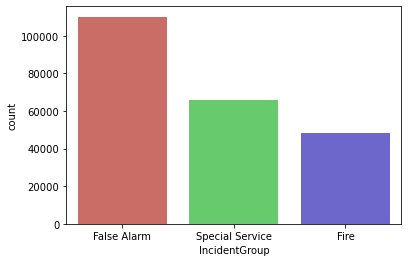

In [9]:
sn.countplot(df0['IncidentGroup'],order=df0['IncidentGroup'].value_counts().index,palette='hls')

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='PropertyCategory', ylabel='count'>

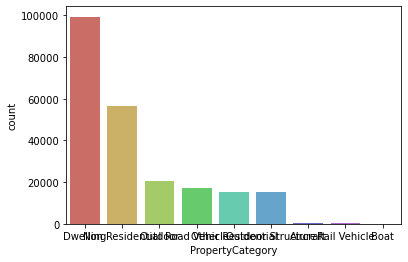

In [10]:
sn.countplot(df0['PropertyCategory'],order=df0['PropertyCategory'].value_counts().index,palette='hls')

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='StopCodeDescription', ylabel='count'>

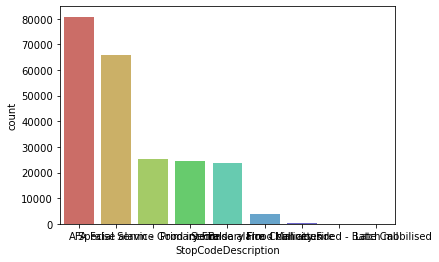

In [13]:
sn.countplot(df0['StopCodeDescription'],order=df0['StopCodeDescription'].value_counts().index,palette='hls')

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0, 0.5, 'count')

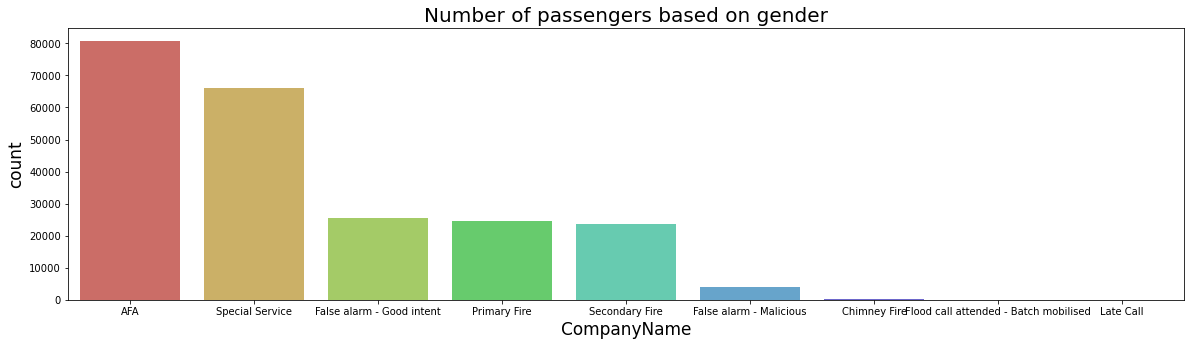

In [24]:
plt.figure(figsize = (20,5))
ax=sn.countplot(df0['StopCodeDescription'],order=df0['StopCodeDescription'].value_counts().index,palette='hls')
ax.set_title("Number of passengers based on gender", fontsize = 20)
plt.xlabel("CompanyName",fontsize=17)
plt.ylabel("count", fontsize=17)

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0, 0.5, 'count')

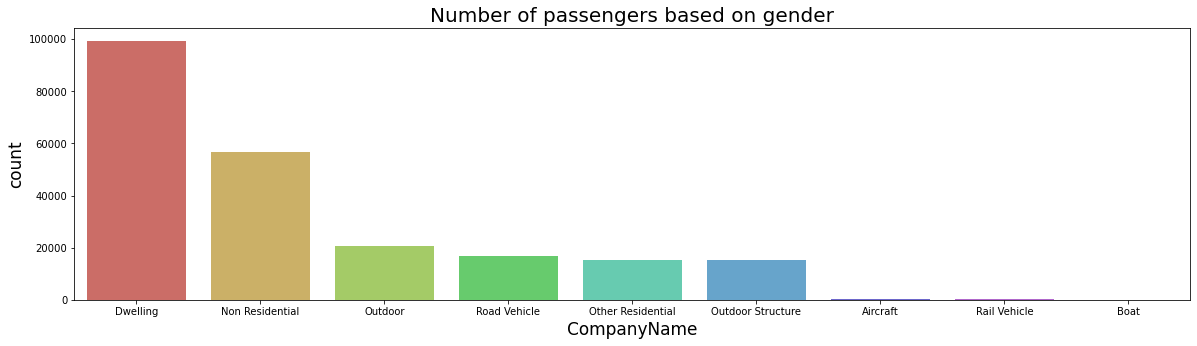

In [25]:
plt.figure(figsize = (20,5))
ax=sn.countplot(df0['PropertyCategory'],order=df0['PropertyCategory'].value_counts().index,palette='hls')
ax.set_title("Number of passengers based on gender", fontsize = 20)
plt.xlabel("CompanyName",fontsize=17)
plt.ylabel("count", fontsize=17)

### Response time  on different group/stop code/ property category

<AxesSubplot:title={'center':'Average First Response Time (s) by Incident Type'}, xlabel='FirstPumpArriving_AttendanceTime', ylabel='HourOfCall'>

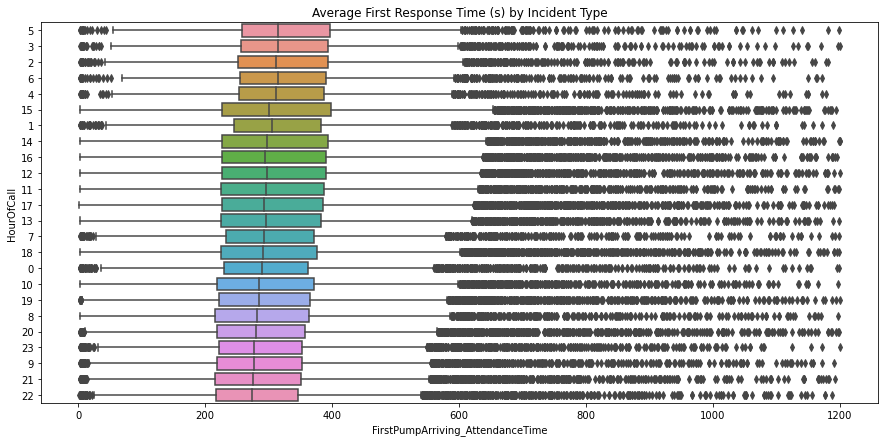

In [8]:
plt.figure(figsize=[15,7],)
plt.title('Average First Response Time (s) by Incident Type')

ranks = df0.groupby("HourOfCall")["FirstPumpArriving_AttendanceTime"].mean().fillna(0).sort_values()[::-1].index
sn.boxplot(data=df0, y='HourOfCall', x='FirstPumpArriving_AttendanceTime', orient='h', order=ranks)

In [ ]:
plt.figure(figsize=[15,7],)
plt.title('Average First Response Time (s) by Hour')

ranks = df0.groupby("StopCodeDescription")["FirstPumpArriving_AttendanceTime"].mean().fillna(0).sort_values()[::-1].index
sn.boxplot(data=df0, y='StopCodeDescription', x='FirstPumpArriving_AttendanceTime', orient='h', order=ranks)

<AxesSubplot:title={'center':'Average First Response Time (s) by Property Type'}, xlabel='FirstPumpArriving_AttendanceTime', ylabel='PropertyCategory'>

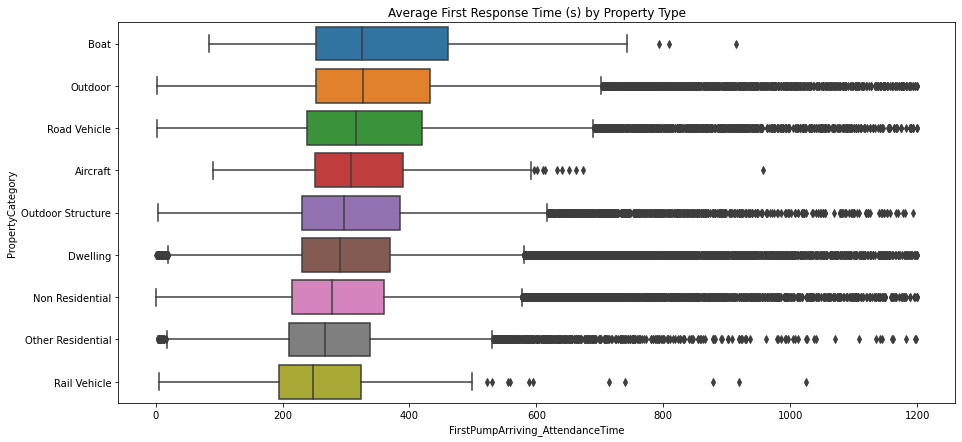

In [16]:
plt.figure(figsize=[15,7],)
plt.title('Average First Response Time (s) by Property Type')

ranks = df0.groupby("PropertyCategory")["FirstPumpArriving_AttendanceTime"].mean().fillna(0).sort_values()[::-1].index
sn.boxplot(data=df0, y='PropertyCategory', x='FirstPumpArriving_AttendanceTime', orient='h', order=ranks)

## Time series Analysis

In [30]:
from plotnine import *

In [31]:
plt.style.use('ggplot')

/opt/conda/envs/sds2020/lib/python3.7/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_count : Removed 244 rows containing non-finite values.


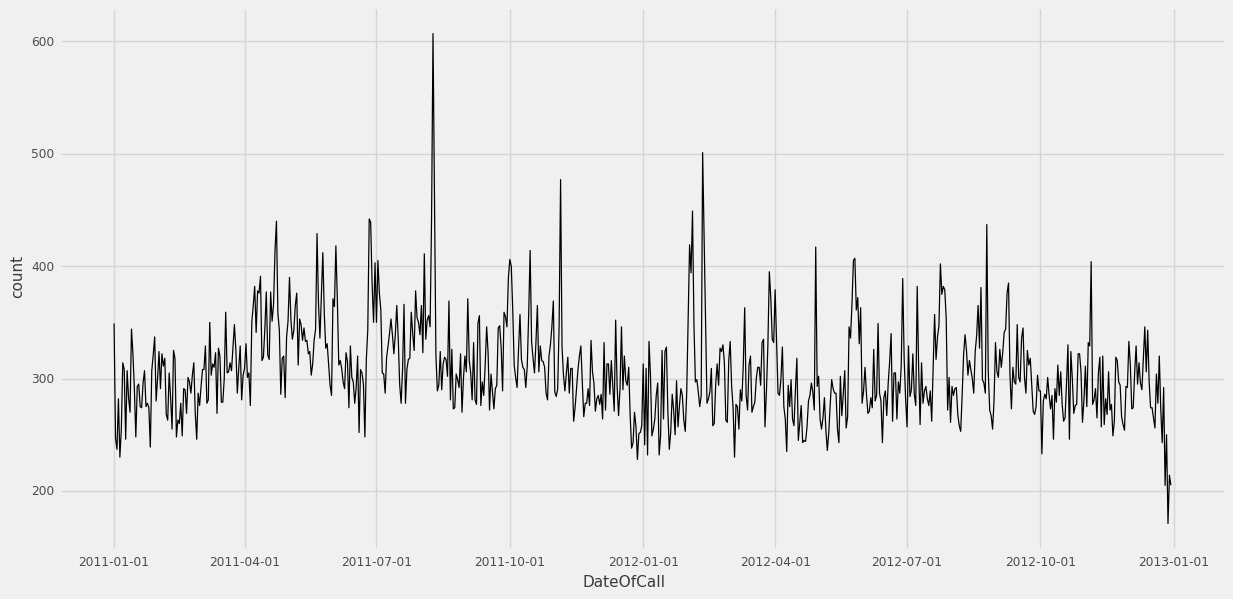

<ggplot: (8731324233337)>

In [32]:
(ggplot(data=df0) + aes(x= 'DateOfCall', group=1) + stat_count(geom='line') + theme_538() +theme(figure_size=(15,7))
+ scale_x_date(limits = ["2011-01-01", "2012-12-30"]))

#### Seems not a very good time series and just skip timeseries prediction and explain it in work

## Hypothesis test

### 1. Is there significant difference in daily Count of Incident type and property type?

In [ ]:
#By incident type

In [ ]:
#First we exract daily frequency by Incident type
# by fool's way I will learn how to do it after this for sure!!!!!!

In [17]:
df0['StopCodeDescription']

260516               Secondary Fire
260517    False alarm - Good intent
260518               Secondary Fire
260519              Special Service
260520      False alarm - Malicious
                    ...            
485051              Special Service
485052                          AFA
485053                          AFA
485054                          AFA
485055              Special Service
Name: StopCodeDescription, Length: 224540, dtype: object

In [19]:
A = df0.loc[df0['StopCodeDescription'] == 'Late Call']
A.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,Easting_rounded,Northing_rounded,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending
262194,6119,2011-01-07,2011,09:29:00,9,Fire,Late Call,NaN,Non Residential,Purpose built office,...,529850,179250,London,Lambeth,NaN,NaN,NaN,NaN,NaN,NaN
268070,39112,2011-01-27,2011,18:17:05,18,Fire,Late Call,NaN,Other Residential,Hotel/motel,...,518250,185250,London,Wembley,230.0,Wembley,NaN,NaN,1.0,1.0
270514,17473111,2011-02-04,2011,15:19:11,15,Fire,Late Call,NaN,Non Residential,Police station,...,527950,181150,London,Soho,588.0,Soho,NaN,NaN,1.0,1.0
285243,43266111,2011-03-26,2011,09:56:12,9,Fire,Late Call,NaN,Dwelling,House - single occupancy,...,521850,189050,London,Hendon,292.0,Hendon,NaN,NaN,1.0,1.0
289415,50750111,2011-04-08,2011,15:27:15,15,Fire,Late Call,NaN,Dwelling,House - single occupancy,...,526150,191350,London,Finchley,7.0,Finchley,NaN,NaN,1.0,1.0


In [20]:
B = df0.loc[df0['StopCodeDescription'] == 'Secondary Fire']
C = df0.loc[df0['StopCodeDescription'] == 'False alarm - Good intent']
#D = df0.loc[df0['StopCodeDescription'] == 'Chimney Fire']
E = df0.loc[df0['StopCodeDescription'] == 'Special Service']
F = df0.loc[df0['StopCodeDescription'] == 'False alarm - Malicious']
G = df0.loc[df0['StopCodeDescription'] == 'Primary Fire']
H = df0.loc[df0['StopCodeDescription'] == 'AFA']

In [ ]:
df = df.groupby(["hour", "location"])['hour'].count().unstack(fill_value=0).stack()

In [23]:
#now add count by date
Adf = A.groupby(A['DateOfCall'].dt.date).size().reset_index(name='Late Call')
Adf.head(15)

,DateOfCall,Late Call
0,2011-01-07,1
1,2011-01-27,1
2,2011-02-04,1
3,2011-03-26,1
4,2011-04-08,1
5,2011-05-02,1
6,2011-05-25,1
7,2011-06-05,1
8,2011-07-14,1
9,2011-07-19,1


In [33]:
Bdf = B.groupby(B['DateOfCall'].dt.date).size().reset_index(name='Secondary Fire')
Cdf = C.groupby(C['DateOfCall'].dt.date).size().reset_index(name='False alarm - Good intent')
#Ddf = D.groupby(D['DateOfCall'].dt.date).size().reset_index(name='Chimney Fire')
Edf = E.groupby(E['DateOfCall'].dt.date).size().reset_index(name='Special Service')
Fdf = F.groupby(F['DateOfCall'].dt.date).size().reset_index(name='False alarm - Malicious')
Gdf = G.groupby(G['DateOfCall'].dt.date).size().reset_index(name='Primary Fire')
Hdf = H.groupby(H['DateOfCall'].dt.date).size().reset_index(name='AFA')

In [ ]:
#Bdf,Cdf,Edf,Fdf,Gdf,Hdf ---select

In [37]:
Fdf.head(10)

,DateOfCall,False alarm - Malicious
0,2011-01-01,9
1,2011-01-02,6
2,2011-01-03,3
3,2011-01-04,7
4,2011-01-05,4
5,2011-01-06,3
6,2011-01-07,3
7,2011-01-08,5
8,2011-01-09,5
9,2011-01-10,2


/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/opt/conda/envs/

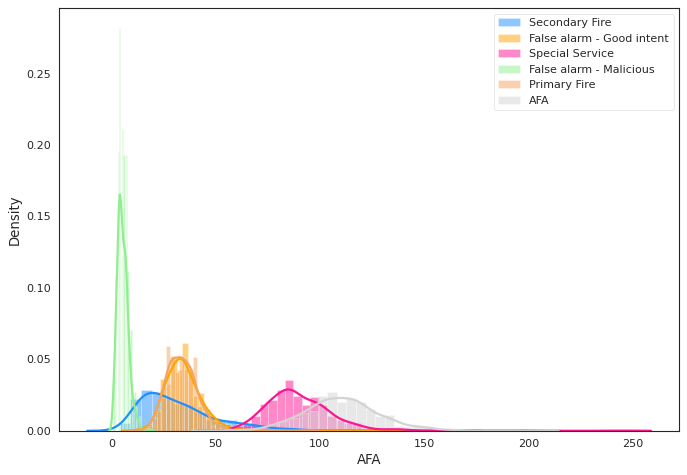

In [50]:
import seaborn as sns
sn.set_style("white")

# Import data
x1 = Bdf['Secondary Fire']
x2 = Cdf['False alarm - Good intent']
x3 = Edf['Special Service']
x4 = Fdf['False alarm - Malicious']
x5 = Gdf['Primary Fire']
x6 = Hdf['AFA']
# Plot
kwargs = dict(hist_kws={'alpha':0.5}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sn.distplot(x1, color="dodgerblue", label="Secondary Fire", **kwargs)
sn.distplot(x2, color="orange", label="False alarm - Good intent", **kwargs)
sn.distplot(x3, color="deeppink", label="Special Service", **kwargs)
sn.distplot(x4, color="lightgreen", label="False alarm - Malicious", **kwargs)
sn.distplot(x5, color="sandybrown", label="Primary Fire", **kwargs)
sn.distplot(x6, color="lightgray", label="AFA", **kwargs)

plt.legend();

In [55]:
#Now the same to the property type
a = df0.loc[df0['PropertyCategory'] == 'Dwelling']
b = df0.loc[df0['PropertyCategory'] == 'Non Residential']
c = df0.loc[df0['PropertyCategory'] == 'Outdoor']
d = df0.loc[df0['PropertyCategory'] == 'Road Vehicle']
e = df0.loc[df0['PropertyCategory'] == 'Other Residential']
f = df0.loc[df0['PropertyCategory'] == 'Outdoor Structure']

In [56]:
adf = a.groupby(a['DateOfCall'].dt.date).size().reset_index(name='Dwelling')
bdf = b.groupby(b['DateOfCall'].dt.date).size().reset_index(name='Non Residential')
cdf = c.groupby(c['DateOfCall'].dt.date).size().reset_index(name='Outdoor')
ddf = d.groupby(d['DateOfCall'].dt.date).size().reset_index(name='Road Vehicle')
edf = e.groupby(e['DateOfCall'].dt.date).size().reset_index(name='Other Residential')
fdf = f.groupby(f['DateOfCall'].dt.date).size().reset_index(name='Outdoor Structure')

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/opt/conda/envs/

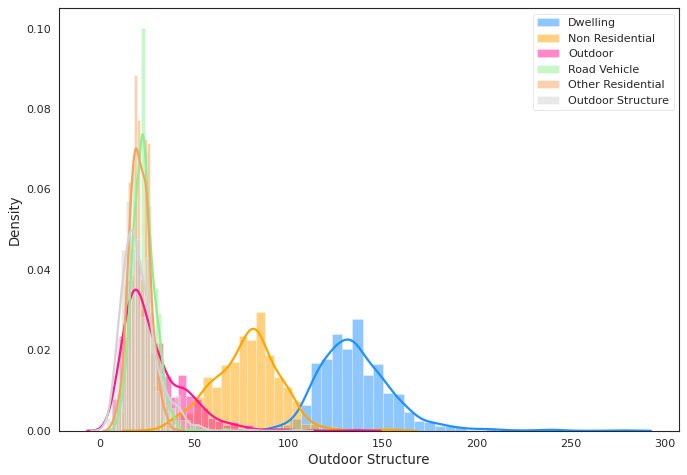

In [57]:
import seaborn as sns
sn.set_style("white")

# Import data
x1 = adf['Dwelling']
x2 = bdf['Non Residential']
x3 = cdf['Outdoor']
x4 = ddf['Road Vehicle']
x5 = edf['Other Residential']
x6 = fdf['Outdoor Structure']
# Plot
kwargs = dict(hist_kws={'alpha':0.5}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sn.distplot(x1, color="dodgerblue", label="Dwelling", **kwargs)
sn.distplot(x2, color="orange", label="Non Residential", **kwargs)
sn.distplot(x3, color="deeppink", label="Outdoor", **kwargs)
sn.distplot(x4, color="lightgreen", label="Road Vehicle", **kwargs)
sn.distplot(x5, color="sandybrown", label="Other Residential", **kwargs)
sn.distplot(x6, color="lightgray", label="Outdoor Structure", **kwargs)

plt.legend();

### Let's run the ANOVA test

In [58]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

#### on incident type

In [78]:
x1 = Bdf['Secondary Fire']
x2 = Cdf['False alarm - Good intent']
x3 = Edf['Special Service']
x4 = Fdf['False alarm - Malicious']
x5 = Gdf['Primary Fire']
x6 = Hdf['AFA']

In [80]:
print(x1)

0      25
1      26
2      24
3      18
4      18
       ..
726     7
727     4
728    11
729    14
730     5
Name: Secondary Fire, Length: 731, dtype: int64


In [60]:
f_oneway(x1, x2, x3, x4, x5, x6)

F_onewayResult(statistic=6059.882418889045, pvalue=0.0)

In [64]:
# Put into dataframe

test = pd.DataFrame()
test['Secondary Fire'] = x1
test['False alarm - Good intent'] = x2
test['Special Service'] = x3
test['False alarm - Malicious'] = x4
test['Primary Fire'] = x5
test['AFA'] = x6

# Stack the data (and rename columns):

stacked_data = test.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'id',
                                            'level_1': 'incident_type',
                                            0:'number_perday'})
print (stacked_data.head(8))

   id              incident_type  number_perday
0   0             Secondary Fire           25.0
1   0  False alarm - Good intent           41.0
2   0            Special Service          127.0
3   0    False alarm - Malicious            9.0
4   0               Primary Fire           38.0
5   0                        AFA          109.0
6   1             Secondary Fire           26.0
7   1  False alarm - Good intent           30.0


In [67]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=stacked_data['number_perday'],
                          groups=stacked_data['incident_type'],
                          alpha=0.05)
print(tukey)

                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
          group1                    group2           meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------------------------------
                      AFA False alarm - Good intent  -75.6922  0.001  -77.7698  -73.6146   True
                      AFA   False alarm - Malicious -105.0367  0.001 -107.1193 -102.9541   True
                      AFA              Primary Fire  -76.8153  0.001  -78.8929  -74.7378   True
                      AFA            Secondary Fire  -78.1888  0.001  -80.2663  -76.1112   True
                      AFA           Special Service  -20.2531  0.001  -22.3306  -18.1755   True
False alarm - Good intent   False alarm - Malicious  -29.3445  0.001  -31.4271  -27.2619   True
False alarm - Good intent              Primary Fire   -1.1231 0.6189   -3.2007    0.9544  False
False alarm - Good intent            Sec

#### one property type

In [68]:
x1 = adf['Dwelling']
x2 = bdf['Non Residential']
x3 = cdf['Outdoor']
x4 = ddf['Road Vehicle']
x5 = edf['Other Residential']
x6 = fdf['Outdoor Structure']

In [69]:
f_oneway(x1, x2, x3, x4, x5, x6)

F_onewayResult(statistic=8491.669892578222, pvalue=0.0)

In [70]:
test = pd.DataFrame()
test['Dwelling'] = x1
test['Non Residential'] = x2
test['Outdoor'] = x3
test['Road Vehicle'] = x4
test['Other Residential'] = x5
test['Outdoor Structure'] = x6

# Stack the data (and rename columns):

stacked_data = test.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'id',
                                            'level_1': 'property_type',
                                            0:'number_perday'})

#run the Tukey Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=stacked_data['number_perday'],
                          groups=stacked_data['property_type'],
                          alpha=0.05)
print(tukey)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
      group1            group2       meandiff p-adj    lower     upper   reject
-------------------------------------------------------------------------------
         Dwelling   Non Residential  -58.4432  0.001  -60.4965    -56.39   True
         Dwelling Other Residential -114.9549  0.001 -117.0081 -112.9016   True
         Dwelling           Outdoor -107.6936  0.001 -109.7468 -105.6403   True
         Dwelling Outdoor Structure -115.0109  0.001 -117.0642 -112.9577   True
         Dwelling      Road Vehicle -112.7182  0.001 -114.7714  -110.665   True
  Non Residential Other Residential  -56.5116  0.001  -58.5649  -54.4584   True
  Non Residential           Outdoor  -49.2503  0.001  -51.3036  -47.1971   True
  Non Residential Outdoor Structure  -56.5677  0.001   -58.621  -54.5145   True
  Non Residential      Road Vehicle   -54.275  0.001  -56.3282  -52.2217   True
Other Residential           Outdoor    7

### 2. Is there significant difference in  response time of Incident type and property type ?

In [ ]:
#By incident type

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/opt/conda/envs/

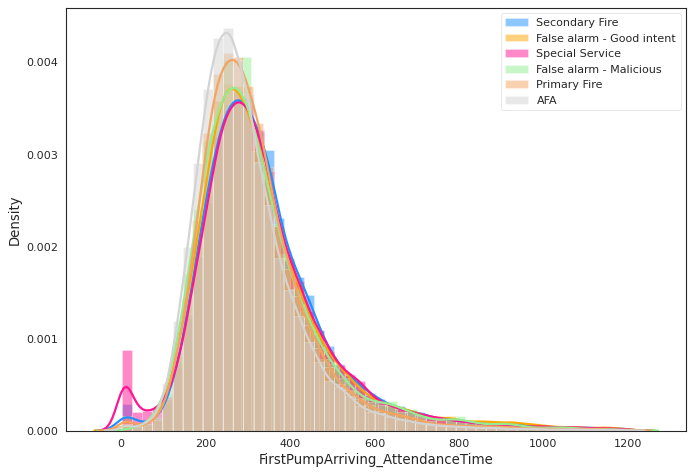

In [48]:
import seaborn as sns
sn.set_style("white")

# Import data
x1 = df0.loc[df0.StopCodeDescription=='Secondary Fire', 'FirstPumpArriving_AttendanceTime']
x2 = df0.loc[df0.StopCodeDescription=='False alarm - Good intent', 'FirstPumpArriving_AttendanceTime']
x3 = df0.loc[df0.StopCodeDescription=='Special Service', 'FirstPumpArriving_AttendanceTime']
x4 = df0.loc[df0.StopCodeDescription=='False alarm - Malicious', 'FirstPumpArriving_AttendanceTime']
x5 = df0.loc[df0.StopCodeDescription=='Primary Fire', 'FirstPumpArriving_AttendanceTime']
x6 = df0.loc[df0.StopCodeDescription=='AFA', 'FirstPumpArriving_AttendanceTime']
# Plot
kwargs = dict(hist_kws={'alpha':0.5}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sn.distplot(x1, color="dodgerblue", label="Secondary Fire", **kwargs)
sn.distplot(x2, color="orange", label="False alarm - Good intent", **kwargs)
sn.distplot(x3, color="deeppink", label="Special Service", **kwargs)
sn.distplot(x4, color="lightgreen", label="False alarm - Malicious", **kwargs)
sn.distplot(x5, color="sandybrown", label="Primary Fire", **kwargs)
sn.distplot(x6, color="lightgray", label="AFA", **kwargs)

plt.legend();

In [ ]:
#By property type

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/opt/conda/envs/

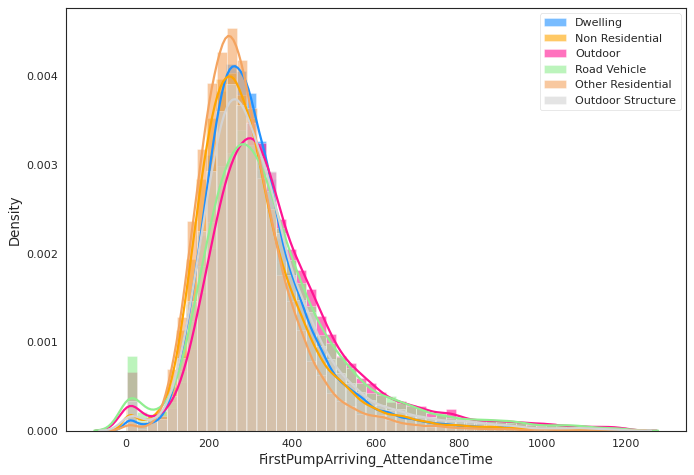

In [49]:
import seaborn as sns
sn.set_style("white")

# Import data
x1 = df0.loc[df0.PropertyCategory=='Dwelling', 'FirstPumpArriving_AttendanceTime']
x2 = df0.loc[df0.PropertyCategory=='Non Residential', 'FirstPumpArriving_AttendanceTime']
x3 = df0.loc[df0.PropertyCategory=='Outdoor', 'FirstPumpArriving_AttendanceTime']
x4 = df0.loc[df0.PropertyCategory=='Road Vehicle', 'FirstPumpArriving_AttendanceTime']
x5 = df0.loc[df0.PropertyCategory=='Other Residential', 'FirstPumpArriving_AttendanceTime']
x6 = df0.loc[df0.PropertyCategory=='Outdoor Structure', 'FirstPumpArriving_AttendanceTime']
# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sn.distplot(x1, color="dodgerblue", label="Dwelling", **kwargs)
sn.distplot(x2, color="orange", label="Non Residential", **kwargs)
sn.distplot(x3, color="deeppink", label="Outdoor", **kwargs)
sn.distplot(x4, color="lightgreen", label="Road Vehicle", **kwargs)
sn.distplot(x5, color="sandybrown", label="Other Residential", **kwargs)
sn.distplot(x6, color="lightgray", label="Outdoor Structure", **kwargs)

plt.legend();

### ANOVA AGAIN
#Now we run the test it likely fail of course

In [162]:
#on incident type
df00 = df0.dropna(subset=['FirstPumpArriving_AttendanceTime'])
x1 = df00.loc[df00.StopCodeDescription=='Secondary Fire', 'FirstPumpArriving_AttendanceTime']
x2 = df00.loc[df00.StopCodeDescription=='False alarm - Good intent', 'FirstPumpArriving_AttendanceTime']
x3 = df00.loc[df00.StopCodeDescription=='Special Service', 'FirstPumpArriving_AttendanceTime']
x4 = df00.loc[df00.StopCodeDescription=='False alarm - Malicious', 'FirstPumpArriving_AttendanceTime']
x5 = df00.loc[df00.StopCodeDescription=='Primary Fire', 'FirstPumpArriving_AttendanceTime']
x6 = df00.loc[df00.StopCodeDescription=='AFA', 'FirstPumpArriving_AttendanceTime']

In [163]:
x1.reset_index(inplace=True, drop=True)
x2.reset_index(inplace=True, drop=True)
x3.reset_index(inplace=True, drop=True)
x4.reset_index(inplace=True, drop=True)
x5.reset_index(inplace=True, drop=True)
x6.reset_index(inplace=True, drop=True)

In [164]:
f_oneway(x1, x2, x3, x4, x5, x6)

F_onewayResult(statistic=614.1780630127063, pvalue=0.0)

In [165]:
data = {"Secondary Fire": x1, 
        "False alarm - Good intent": x2, 
        "Special Service": x3,
       "False alarm - Malicious": x4,
       "Primary Fire": x5,
       "AFA": x6} 
test = pd.concat(data, 
               axis = 1) 

In [166]:
test.head()

,Secondary Fire,False alarm - Good intent,Special Service,False alarm - Malicious,Primary Fire,AFA
0,551.0,339.0,330.0,291.0,536.0,221.0
1,241.0,269.0,192.0,196.0,271.0,334.0
2,454.0,260.0,550.0,551.0,514.0,338.0
3,212.0,612.0,276.0,277.0,359.0,292.0
4,225.0,381.0,246.0,311.0,215.0,79.0


In [167]:
# Stack the data (and rename columns):

stacked_data = test.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'id',
                                            'level_1': 'incident_type',
                                            0:'time'})

In [168]:
tukey = pairwise_tukeyhsd(endog=stacked_data['time'],
                          groups=stacked_data['incident_type'],
                          alpha=0.05)
print(tukey)

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
          group1                    group2          meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------------------
                      AFA False alarm - Good intent  40.4737  0.001  37.4264  43.5211   True
                      AFA   False alarm - Malicious  29.8551  0.001  22.9398  36.7705   True
                      AFA              Primary Fire  17.1585  0.001  14.1175  20.1994   True
                      AFA            Secondary Fire  42.5409  0.001  39.4258   45.656   True
                      AFA           Special Service  34.6617  0.001  32.3024  37.0211   True
False alarm - Good intent   False alarm - Malicious -10.6186  0.001 -17.8862   -3.351   True
False alarm - Good intent              Primary Fire -23.3153  0.001 -27.0893 -19.5412   True
False alarm - Good intent            Secondary Fire   2.0672 0.6216  -

In [ ]:
#on property type

In [170]:
df00 = df0.dropna(subset=['FirstPumpArriving_AttendanceTime'])
x1 = df00.loc[df00.PropertyCategory=='Dwelling', 'FirstPumpArriving_AttendanceTime']
x2 = df00.loc[df00.PropertyCategory=='Non Residential', 'FirstPumpArriving_AttendanceTime']
x3 = df00.loc[df00.PropertyCategory=='Outdoor', 'FirstPumpArriving_AttendanceTime']
x4 = df00.loc[df00.PropertyCategory=='Road Vehicle', 'FirstPumpArriving_AttendanceTime']
x5 = df00.loc[df00.PropertyCategory=='Other Residential', 'FirstPumpArriving_AttendanceTime']
x6 = df00.loc[df00.PropertyCategory=='Outdoor Structure', 'FirstPumpArriving_AttendanceTime']

In [171]:
x1.reset_index(inplace=True, drop=True)
x2.reset_index(inplace=True, drop=True)
x3.reset_index(inplace=True, drop=True)
x4.reset_index(inplace=True, drop=True)
x5.reset_index(inplace=True, drop=True)
x6.reset_index(inplace=True, drop=True)
f_oneway(x1, x2, x3, x4, x5, x6)

F_onewayResult(statistic=757.5244061676672, pvalue=0.0)

In [172]:
data = {"Dwelling": x1, 
        "Non Residential": x2, 
        "Outdoor": x3,
       "Road Vehicle": x4,
       "Other Residential": x5,
       "Outdoor Structure": x6} 
test = pd.concat(data, 
               axis = 1) 

In [174]:
# Stack the data (and rename columns):

stacked_data = test.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'id',
                                            'level_1': 'property_type',
                                            0:'time'})
tukey = pairwise_tukeyhsd(endog=stacked_data['time'],
                          groups=stacked_data['property_type'],
                          alpha=0.05)
print(tukey)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj  lower    upper   reject
---------------------------------------------------------------------------
         Dwelling   Non Residential -11.5005 0.001 -13.7722  -9.2289   True
         Dwelling Other Residential -29.1012 0.001 -32.7678 -25.4347   True
         Dwelling           Outdoor  46.8294 0.001   43.528  50.1308   True
         Dwelling Outdoor Structure  11.2347 0.001    7.526  14.9433   True
         Dwelling      Road Vehicle  33.2895 0.001  29.7131  36.8658   True
  Non Residential Other Residential -17.6007 0.001 -21.4273 -13.7741   True
  Non Residential           Outdoor    58.33 0.001  54.8517  61.8083   True
  Non Residential Outdoor Structure  22.7352 0.001  18.8682  26.6021   True
  Non Residential      Road Vehicle    44.79 0.001  41.0497  48.5303   True
Other Residential           Outdoor  75.9307 0.001   71.416  80.4453   True
Other Reside

## Regression Modeling

## Clustering